#### Project: Skill Demand

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from adjustText import adjust_text
import matplotlib.ticker as mticker
import seaborn as sns
#load the data
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
dfj = dataset['train'].to_pandas()
#data clean-up
dfj['job_posted_date']=pd.to_datetime(dfj['job_posted_date'])
dfj['job_skills'] = dfj['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

dfj_DA = dfj[dfj['job_title_short']=='Data Analyst'].copy() # calling specificallly the role from the column for the remainder of the lessons

In [5]:
# Only get data analyst jobs in the US
dfj_DA_US = dfj[(dfj['job_title_short'] == 'Data Analyst') & (dfj['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
dfj_DA_US = dfj_DA_US.dropna(subset=['salary_year_avg'])

dfj_DA_US = dfj_DA_US.explode('job_skills')

dfj_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [6]:
dfj_DA_top_pay = dfj_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

dfj_DA_top_pay = dfj_DA_top_pay.head(10)

dfj_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [7]:
dfj_DA_skills = dfj_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

dfj_DA_skills = dfj_DA_skills.head(10).sort_values(by='median', ascending=False)

dfj_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


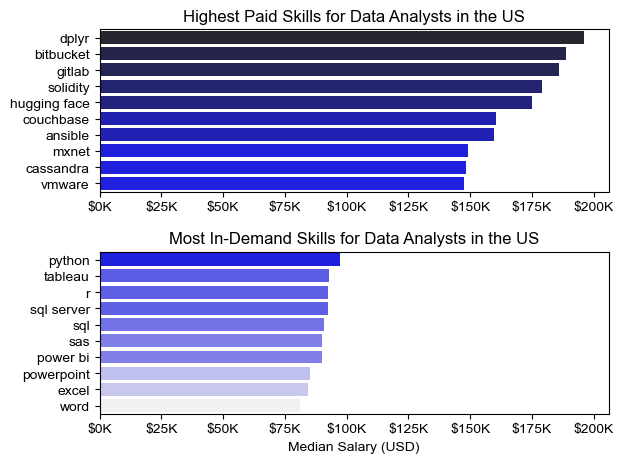

In [8]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=dfj_DA_top_pay, x='median', y=dfj_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=dfj_DA_skills, x='median', y=dfj_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()